In [1]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize
import nltk

In [2]:
#读取数据
data=pd.read_csv('Market_Basket_Optimisation.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#想办法把这些数据放到一个 transactions 中
transactions=[]
#另外做个排序  用一个字典存储key:value  key是字符串 value是出现的次数
item_count={}
for i in range(0,data.shape[0]):#遍历所有的行
    temp=[]
    for j in range(0,data.shape[1]):#在一行中遍历每一个列于元素
        item=str(data.values[i,j])#把元素的值转成字符串类型 原有的 名字类型都是str  但是nan类型都是float 所以这里强转一下
        if item!='nan':
            temp.append(item)
            if item not in item_count:#因为这里的item_count是一个全局的变量  所以这里统计的是所有的词出现的次数 形成了一个字典
                item_count[item]=1
            else:
                item_count[item]+=1
    transactions.append(temp)
print('transactions前10个元素:\n',transactions[0:10])
print("带有数量的词的字典")
item_count

transactions前10个元素:
 [['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries']]
带有数量的词的字典


{'shrimp': 536,
 'almonds': 153,
 'avocado': 250,
 'vegetables mix': 193,
 'green grapes': 68,
 'whole weat flour': 70,
 'yams': 86,
 'cottage cheese': 239,
 'energy drink': 200,
 'tomato juice': 228,
 'low fat yogurt': 574,
 'green tea': 991,
 'honey': 356,
 'salad': 37,
 'mineral water': 1788,
 'salmon': 319,
 'antioxydant juice': 67,
 'frozen smoothie': 475,
 'spinach': 53,
 'olive oil': 494,
 'burgers': 654,
 'meatballs': 157,
 'eggs': 1348,
 'chutney': 31,
 'turkey': 469,
 'milk': 972,
 'energy bar': 203,
 'whole wheat rice': 439,
 'whole wheat pasta': 221,
 'french fries': 1282,
 'soup': 379,
 'light cream': 117,
 'shallot': 58,
 'frozen vegetables': 715,
 'spaghetti': 1306,
 'pet food': 49,
 'cookies': 603,
 'cooking oil': 383,
 'champagne': 351,
 'chocolate': 1230,
 'chicken': 450,
 'oil': 173,
 'fresh tuna': 167,
 'tomatoes': 513,
 'black tea': 107,
 'extra dark chocolate': 90,
 'protein bar': 139,
 'red wine': 211,
 'pasta': 118,
 'pepper': 199,
 'shampoo': 37,
 'rice': 141,


In [4]:
def remove_stop_words(f):
    stop_words = ['Movie']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

# 生成词云
def create_word_cloud(f):
    f = remove_stop_words(f)
    cut_text = word_tokenize(f)
    #print(cut_text)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud3.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

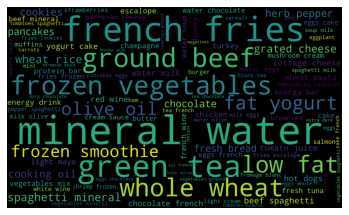

In [5]:
#首先得到all_word  然后丢进函数中去
all_word=' '.join('%s'%item for item in transactions)
create_word_cloud(all_word)

In [6]:
#输出一下top10的商品
print(sorted(item_count.items(),key=lambda x:x[1],reverse=True))

[('mineral water', 1788), ('eggs', 1348), ('spaghetti', 1306), ('french fries', 1282), ('chocolate', 1230), ('green tea', 991), ('milk', 972), ('ground beef', 737), ('frozen vegetables', 715), ('pancakes', 713), ('burgers', 654), ('cake', 608), ('cookies', 603), ('escalope', 595), ('low fat yogurt', 574), ('shrimp', 536), ('tomatoes', 513), ('olive oil', 494), ('frozen smoothie', 475), ('turkey', 469), ('chicken', 450), ('whole wheat rice', 439), ('grated cheese', 393), ('cooking oil', 383), ('soup', 379), ('herb & pepper', 371), ('honey', 356), ('champagne', 351), ('fresh bread', 323), ('salmon', 319), ('brownies', 253), ('avocado', 250), ('hot dogs', 243), ('cottage cheese', 239), ('tomato juice', 228), ('butter', 226), ('whole wheat pasta', 221), ('red wine', 211), ('yogurt cake', 205), ('light mayo', 204), ('energy bar', 203), ('ham', 203), ('energy drink', 200), ('pepper', 199), ('vegetables mix', 193), ('cereals', 193), ('muffins', 181), ('oil', 173), ('french wine', 169), ('fres